In [90]:
import plotly.express as px
import pandas as pd
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [91]:
tweets = pd.read_csv(
    'https://github.com/satzz59/Plotly_example/raw/main/scraped_tweets.csv')

tweets.head()

,tweetid,username,description,location,Country,alpha-3,following,followers,totaltweets,retweetcount,text,hashtags
0,tweet_01,janmendling,| @HumboldtUni | https://t.co/UnuwsmYEWJ |...,NaN,NaN,NaN,640,1321,3079,0,It seems that #Scholz and #Macron work towards...,"['Scholz', 'Macron', 'appeasement', 'Russia', ..."
1,tweet_02,coope125,focusing on ðŸ‡·ðŸ‡º military operations\nÐ¯ Ð...,"Denmark, New Brunswick",Denmark,DNK,20,2382,1803,0,The seventh humanitarian convoy from #Bashkort...,"['Bashkortostan', 'Lugansk', 'Russia', 'LPR', ..."
2,tweet_03,UKRinSGP,Ukrainian Embassy in Singapore / ÐŸÐ¾ÑÐ¾Ð»ÑŒÑ...,Singapore,Singapore,SGP,454,2400,7414,293,#Russia must stop blocking humanitarian corrid...,['Russia']
3,tweet_04,JohnGMandziuk,"Speaker, Educator, Consultant driving the conv...",Canada,Canada,CAN,2716,596,54457,70,#Ukraine: Ukrainian forces destroyed the first...,"['Ukraine', 'Russia']"
4,tweet_05,Metalkas,#custombiker #HarleyDavidson #Metal ðŸ¤˜. #Me...,Aranjuez (Madrid),Spain,ESP,339,355,12122,254,Windows if #Ukraine. Broken by #Russia. Each w...,"['Ukraine', 'Russia']"


**1a. To find out which country involved in trending Ukraine vs Russia hashtag.**

The below chart shows the geographical location (Country) of most tweets.

In [92]:
country_count = tweets.groupby(['alpha-3','Country'])[
    'username'].size().to_frame('country_count').reset_index()
fig = px.scatter_geo(country_count, locations="alpha-3", color="alpha-3",
                     hover_name="Country", size="country_count",
                     projection="natural earth", title="Country wise Tweets")
fig.show()

**1b. Country with most tweets**

The below chart shows the most tweets from each country.

In [93]:
fig = px.bar(country_count, x='Country', y='country_count', color='Country',
             title="Tweets count by Country", labels={ 'country_count': 'Count of Tweets'})
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

**2a. To analyse the popular hashtag under this category.**

The below word cloud is used to show the popular hashtag.

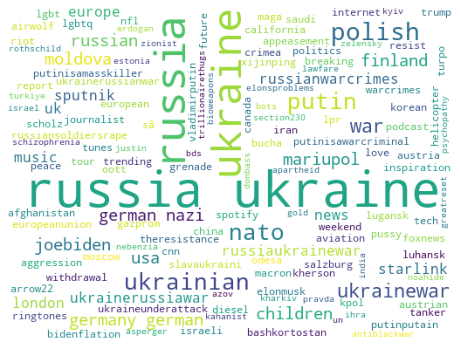

In [111]:
tweets['hashtags'] = tweets['hashtags'].str.strip("[]")
tweets['hashtags'] = tweets['hashtags'].str.capitalize()
tweets_head = pd.DataFrame()
tweets_head['diff']=(tweets['hashtags'].str.split(',',expand=True).stack())
tweets_head['diff'] =tweets_head['diff'].apply(lambda x : x.strip("'").lower().replace("'","").replace(" ",""))

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(tweets_head['diff']))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.show()



**2b. Count of Hashtags**

The below graph is used to show the popular hashtag based on the count.

In [95]:
hashtag_count = tweets_head.groupby(['diff'])[
    'diff'].count().to_frame('hashtag_count').reset_index()

fig = px.bar(hashtag_count, x='diff', y='hashtag_count', color='hashtag_count',
             title="Count of Hashtags", labels={ 'hashtag_count': 'Count of Hashtags', 'diff':'Hashtags'})
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

**3. Tweets with 2 or more hashtags along with number of retweets.**

The below chart shows the number of tweets with 2 or more hashtags and tweets with number of retweets as well.

In [106]:
list_hashtag = list(tweets['hashtags'])
list_temp=[]
for hashtag in list_hashtag:
  temp = hashtag.replace("'","").lower()
  list_temp.append(temp.split(", "))

list_index=[]

for (index, item) in enumerate(list_temp):
  if len(item)>1 and ('ukraine' in item or 'russia' in item):
    list_index.append(index)

retweets_list = []
tweetid_list = []
for i in list_index:
  retweets_list.append(tweets['retweetcount'][i])
  tweetid_list.append(tweets['tweetid'][i])

retweets = pd.DataFrame()
retweets['tweetid'] = tweetid_list
retweets['retweet_count'] = retweets_list

summry_retweet = pd.DataFrame()
summry_retweet['Count']=[len(tweetid_list)]
summry_retweet['Total']=['Total']

r1 = retweets.sort_values(by='retweet_count', ascending=False)

figure = make_subplots(rows=1, cols=2, subplot_titles=('Total Tweets with 2 or more Hashtags', 'Tweets engagement level (Retweets)'))
fig1 = px.bar(summry_retweet, x='Total', y='Count')
fig2 = px.bar(r1, x='tweetid', y='retweet_count')


figure.add_trace(fig1['data'][0], row=1, col=1)
figure.add_trace(fig2['data'][0], row=1, col=2)

figure.show()



**4. To predict the tweets reach with or without using hashtags.**

The below graph shows the tweet's reach based on the follower counts.

In [108]:
followers = tweets.sort_values(by='followers', ascending=False)
fig = px.bar(followers, x='tweetid', y='followers', color='username',
             title="Potential reach of tweets based on followers", labels={ 'followers': 'Count of followers', 'tweetid':'Tweet'})
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

**5. To identify which country has most poeple support.**

The below graph shows the country with most people support based on total followers count for each country.

In [110]:
country_count = tweets.groupby(['Country'])[
    'followers'].sum().to_frame('country_support').reset_index()

fig = px.bar(country_count, x='Country', y='country_support', color='Country',
             title="Country with most people support based on followers count", labels={ 'country_support': 'Count of followers for each Country'})
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()